# Prediction using Unsupervised ML
This notebook will walk through some of the basics of K-Means Clustering.

In [10]:
#loading liabraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [7]:
iris = load_iris()

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Data Visualization

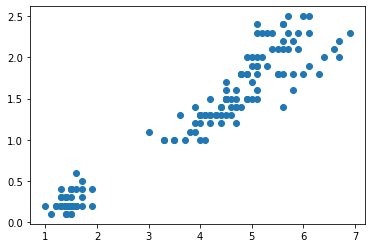

In [32]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

## Training the Algorithm

In [36]:
km = KMeans(n_clusters=3)
df['clusters'] = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [38]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [39]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Clusters Representation

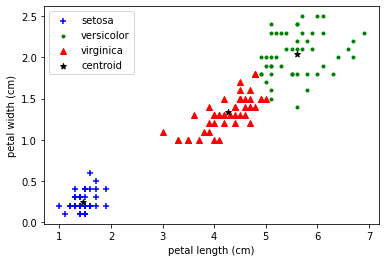

In [53]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+', label='setosa')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green', marker='.', label='versicolor')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='red', marker='^', label='virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [62]:
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

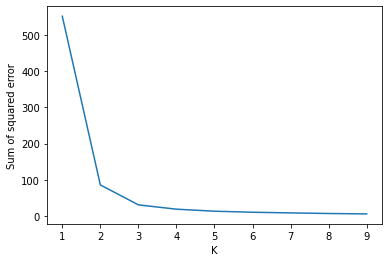

In [64]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)